<center><h1> TD N°1 : SVM avec sklearn </h1></center>
    
    
Pour installer un package vous pouvez utiliser la commande suivante :
    
```
!pip install <nom_module>
```

## Import package

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import datasets

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import LinearSVC
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn_evaluation import plot
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Web request
import requests
import io

## Function

**Merci de lire comment s'utilise la fonction avant de l'utiliser !**

In [2]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [3]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coefficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisées.
      ATTENTION les passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

## Exercice N°1 : Classification données IRIS avec un SVM


#### Exploration and data analysis (EDA)
1) Importer le dataset Iris

2) Faire des stats descriptives pour mieux comprendre le dataset

3) Recoder les données dans le bon format si nécessaire 

4) Découper le dataset en train et test

#### Modélisation binaire (2 target)

5) Importer les modèles de  **régression logistic , SVC, LinearSVC et SGDClassifier** avec sklearn

6) Choisir maximum 2 colonnes dans votre nouveau data et entrainer un SVM avec le module SVC.<br>
- 6.1) Tracer la frontière de décision de votre modèle avec la fonction fournie. Visualiser le résultat.<br>
- 6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
- 6.3) Commenter l'effet de C sur votre modèle<br>
- 6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>


7) Entrainer les 4 modèles sur les données et évaluer la performance des modèles (uniquement avec le dataset train)<br>
   Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
   Réaliser une cross-validation pour évaluer votre modèle.<br>
   Justifier le type de cross_validation choisie.<br>

8) Imaginons que ce soit le SVM par défaut qui donne le meilleur score, tuner ce modèle pour l'améliorer
- 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
- 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
- 8.3) **Uniquement si vous avez le temps**, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des          *validation curve*.

9) Entrainer votre modèle sur les meilleurs hyperparamètres. 

10) Réaliser une prédiction avec votre modèle sur le dataset test.<br> 
    Evaluer la performance de votre modèle.<br>
    Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie.<br>
    Commenter les résultats


#### Modélisation multiclass

11) A partir du dataset iris avec les 3 espèces, réaliser une classification multiclass.
- 11.1) Tester les différentes méthodes, OVR et OVO  
- 11.2) Existe-il des différences entre les méthodes?

## Partie code, a vous de jouer 🐍

### Exploration and data analysis

#### 1) Importer le dataset Iris depuis sklearn

In [4]:
sk_iris = datasets.load_iris()
sk_iris

iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=sk_iris['feature_names']+['species'] )
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Le dataset Iris contient 150 lignes (observations) et 5 colonnes (variables)

#### 2) Statistiques descriptives

##### Valeurs manquantes

In [5]:
iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Il n'y a pas de valeurs manquantes dans le dataset

##### Stats desc

In [6]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### Outliers

In [7]:
def detect_outliers(iris):
    outliers = {}
    
    for column in iris.columns:
        # Calcul des quartiles
        Q1 = iris[column].quantile(0.25)
        Q3 = iris[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calcul des limites pour les outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Détection des outliers
        outliers[column] = iris[(iris[column] < lower_bound) | (iris[column] > upper_bound)]
    
    return outliers

# Détecter les outliers dans le dataset
outliers = detect_outliers(iris)

# Afficher les outliers détectés pour chaque variable
for column, values in outliers.items():
    print(f"Outliers pour {column}:")
    print(values)
    print("\n")

Outliers pour sepal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), species]
Index: []


Outliers pour sepal width (cm):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

    species  
15      0.0  
32      0.0  
33      0.0  
60      1.0  


Outliers pour petal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), species]
Index: []


Outliers pour petal width (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), species]
Index: []


Outliers pour species:
Empty DataF

Ici, il y aurait 4 outliers pour la variable sepal, pour les individus 15, 32, 33 et 60. Nous allons visualiser cela avec un boxplot

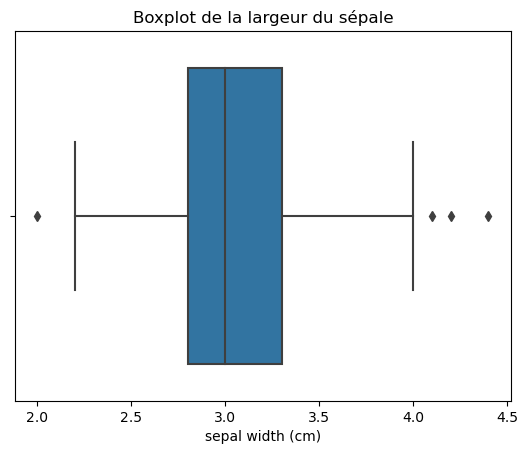

In [8]:
sns.boxplot(x=iris['sepal width (cm)'])
plt.title('Boxplot de la largeur du sépale')
plt.show()

Nous pouvons observer ces 4 outliers sur le boxplot, nous décidons tout de même de les conserver.

##### Matrice de corrélation

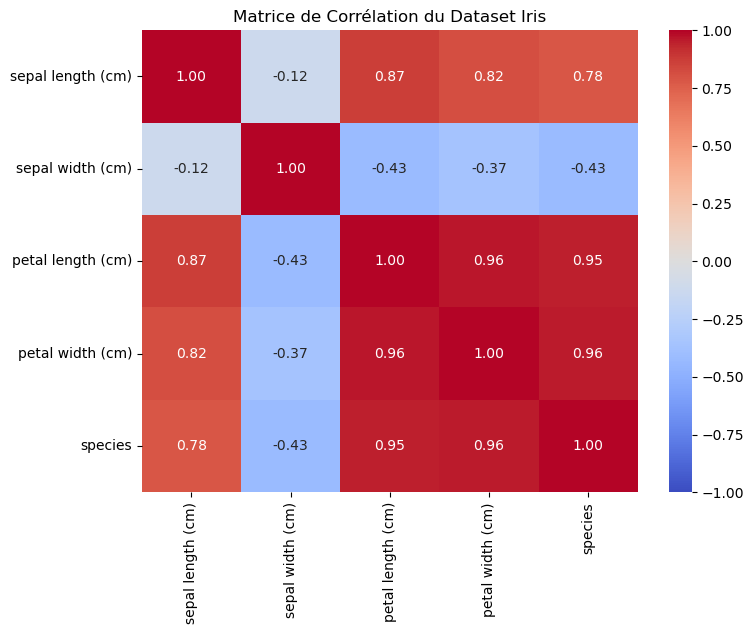

In [9]:
correlation_matrix = iris.corr()

correlation_matrix

# Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation du Dataset Iris')
plt.show()

Nous remarquons de forte corrélation notamment entre species, petal width, petal length.

Test de pygwalker

In [10]:
import pygwalker as pyg
walker = pyg.walk(iris)

Box(children=(HTML(value='\n<div id="ifr-pyg-00062dcaddca7b4cpKB4XRAU6hQ5JxPV" style="height: auto">\n    <hea…

#### 3) Recoder variables, si besoin

In [11]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species              float64
dtype: object

Recodage de la variable espèce (species) en int, pour créer des "catégories"

In [12]:
iris["species"]=iris["species"].astype('int')
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
dtype: object

### Modélisation binaire

Attention à bien choisir un dataset contenant uniquement **2** espèces pour la modélisation

In [13]:
iris_binaire = iris[iris['species'].isin([0, 1])]

print("Distribution des classes après binarisation :")
print(iris_binaire['species'].value_counts())

Distribution des classes après binarisation :
0    50
1    50
Name: species, dtype: int64


#### 4) Découper data set en train et test

In [14]:
#Séparation des données
X = iris_binaire.drop(columns='species')  #Variables explicatives donc on enlève la target
y = iris_binaire['species']

In [15]:
#Découpage du data set en train (80%) et test (20%) : 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [16]:
y_train.value_counts()

0    41
1    39
Name: species, dtype: int64

In [17]:
y_test.value_counts()

1    11
0     9
Name: species, dtype: int64

Le dataset est équilibré notamment pour le train.

Nous faisons le choix de ne pas standardiser nos données car elles sont exprimées dans la même valeur : en centimètres.

#### 5) Importer les modules pour la modélisation

In [18]:
#... au début du code

#### 6) Garder uniquement 2 colonnes du dataset et entrainer un SVM avec module SVC

6.1) Tracer la frontière de décision de votre modèle avec la fonction **plot_svc_decision_boundary**. Visualiser le résultat.<br>
6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
6.3) Commenter l'effet de $C$ sur votre modèle<br>
6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>



#### Modélisation binaire avec uniquement 2 features ⚠️

In [19]:
X_train_2_features = X_train[['sepal length (cm)', 'sepal width (cm)']]
X_test_2_features = X_test[['sepal length (cm)', 'sepal width (cm)']]

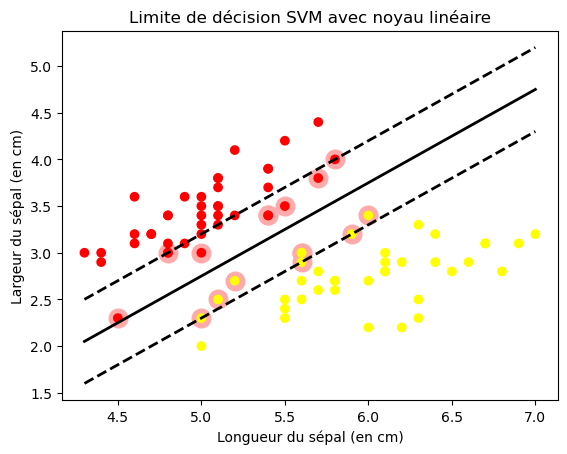

In [20]:
# Entraîner le modèle SVM avec un noyau linéaire
model = SVC(kernel='linear', C=1) #Ici on a C=1
model.fit(X_train_2_features, y_train)

# Fonction pour tracer la frontière de décision pour un SVM avec noyau linéaire.
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    # Récupérer les coefficients du modèle (poids et biais)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Calculer la ligne de décision (frontière)
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    # Calculer les marges
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # Récupérer les vecteurs de support
    svs = svm_clf.support_vectors_
# Tracer les données et les vecteurs de support
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')

    # Tracer la frontière de décision et les marges
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plot_svc_decision_boundary(model, X_train_2_features['sepal length (cm)'].min(), X_train_2_features['sepal length (cm)'].max())

# Ajouter les données
plt.scatter(X_train_2_features['sepal length (cm)'], X_train_2_features['sepal width (cm)'], c=y_train, cmap='autumn')
plt.xlabel('Longueur du sépal (en cm)')
plt.ylabel('Largeur du sépal (en cm)')
plt.title('Limite de décision SVM avec noyau linéaire')
plt.show()

Nous pouvons observer que les deux espèces sont plutôt bien séparées via la frontière de décision

### Faire varier le critère de régularisation C

"C" est un hyperparamètre permettant de régulariser le modèle

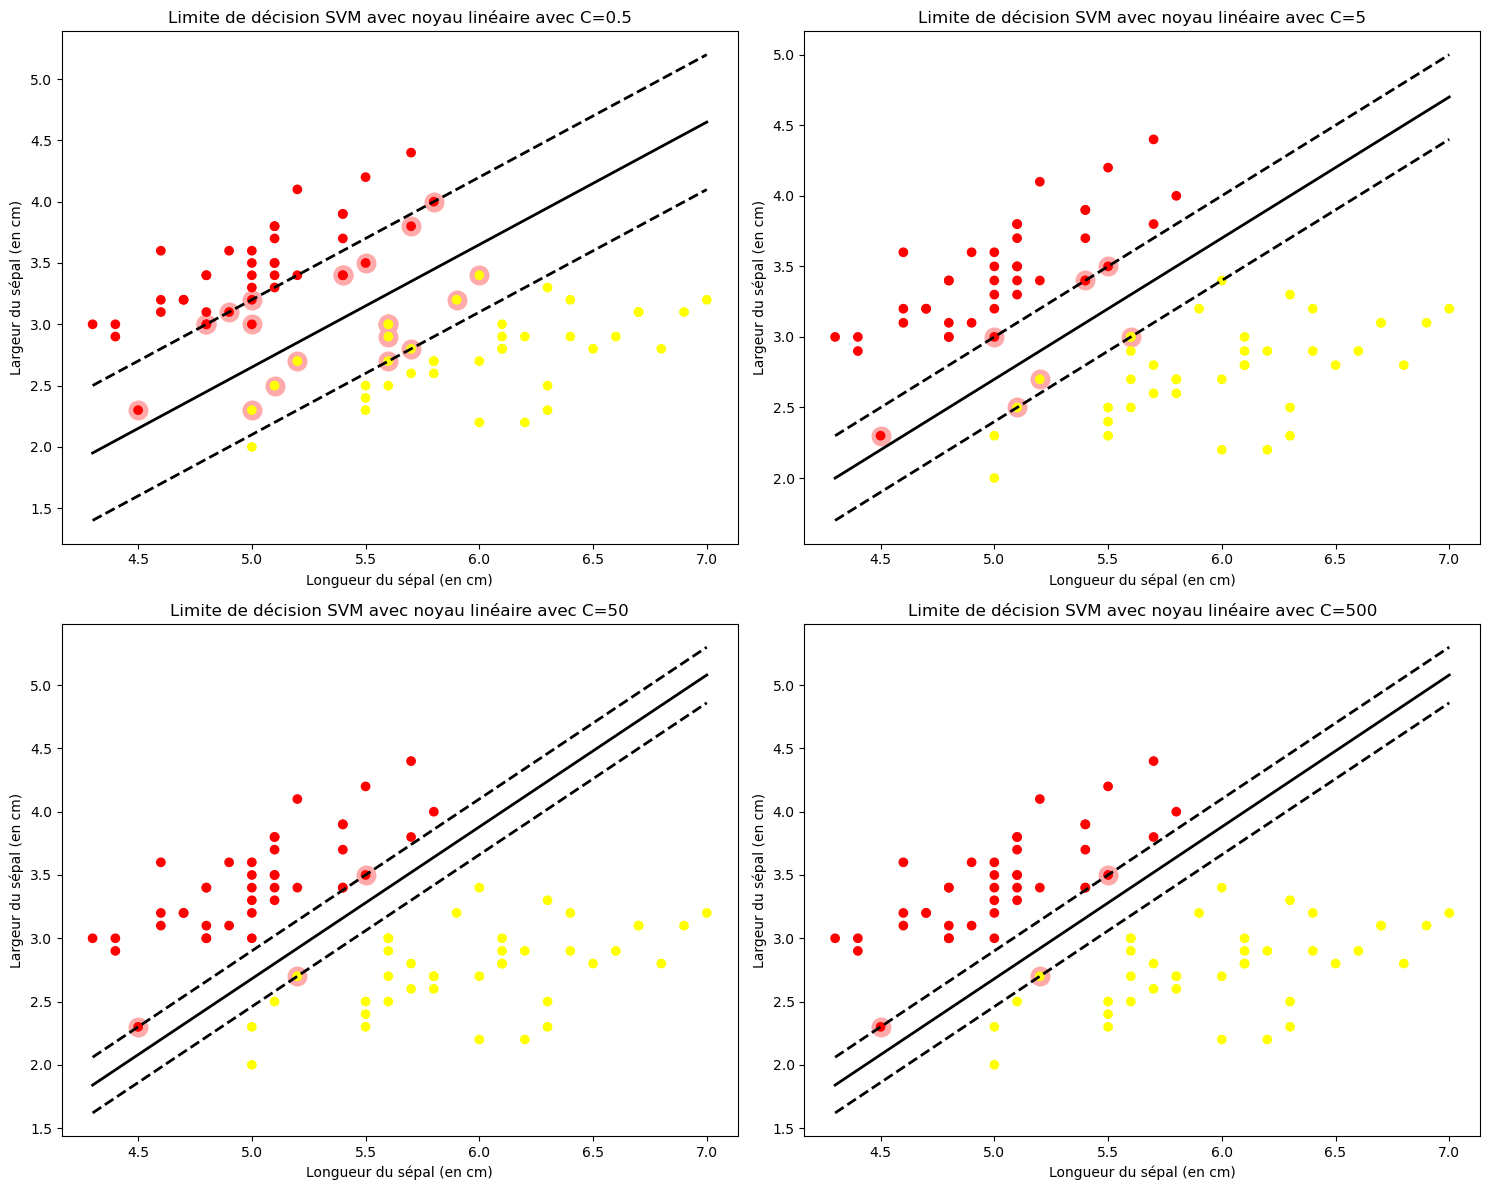

In [21]:
# Liste des valeurs de C à tester
C_values = [0.5, 5, 50, 500]

# Créer une figure pour afficher les frontières de décision
plt.figure(figsize=(15, 12))

# Boucle pour entraîner et afficher les frontières de décision pour chaque valeur de C
for i, C in enumerate(C_values, start=1):
    # Entraîner le modèle SVM avec la valeur de C
    model = SVC(kernel='linear', C=C)
    model.fit(X_train_2_features, y_train)

    # Créer un sous-graphique pour chaque valeur de C
    plt.subplot(2, 2, i)
    plot_svc_decision_boundary(model, X_train_2_features['sepal length (cm)'].min(), X_train_2_features['sepal length (cm)'].max())
    
    # Ajouter les données
    plt.scatter(X_train_2_features['sepal length (cm)'], X_train_2_features['sepal width (cm)'], c=y_train, cmap='autumn')
    plt.xlabel('Longueur du sépal (en cm)')
    plt.ylabel('Largeur du sépal (en cm)')
    plt.title(f'Limite de décision SVM avec noyau linéaire avec C={C}')
    
# Afficher les graphiques
plt.tight_layout()
plt.show()

##### Faites varier le critère de régularisation  𝐶 et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.
    

##### Commenter l'effet de C

Un petit paramètre C  dans un modèle de classification indique que celui-ci est relativement tolérant aux erreurs de classification. Cela signifie que le modèle sera moins strict lorsqu'il rencontre des points de données mal classés et sera donc plus robuste face aux bruits ou anomalies présentes dans les données d'entraînement. En d'autres termes, il accorde moins de poids aux erreurs de classification, ce qui peut être bénéfique lorsque les données sont bruyantes. Cependant, cette tolérance accrue peut également entraîner un sous-ajustement du modèle, car une marge trop large pour séparer les classes pourrait entraîner une mauvaise séparation des données et une performance sous-optimale sur de nouvelles données.

À l'inverse, un grand paramètre C (par exemple égal à 500 ici) impose une marge plus stricte, ce qui signifie que les erreurs de classification sont fortement pénalisées. Le modèle cherche à classer chaque point de données de manière aussi précise que possible, ce qui le rend très sensible aux fluctuations et aux imperfections dans les données d'entraînement. Cela peut entraîner un sur-ajustement (=overfitting), où le modèle devient trop complexe et trop spécifique aux données d'entraînement. Un modèle sur-ajusté aura tendance à bien performer sur les données d'entraînement, mais sa capacité à généraliser sur de nouvelles données sera réduite, car il aura appris à "s'adapter" aux bruits spécifiques du jeu de données d'entraînement plutôt qu'aux tendances générales.

#### Changer de paire de feature

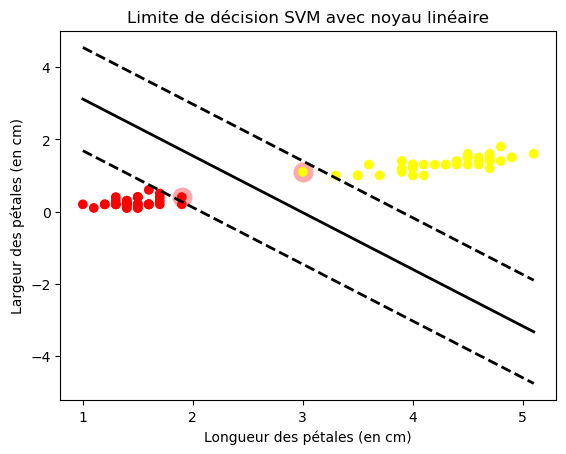

In [22]:
# On garde une nouvelle paire de features pour la modélisation binaire
X_train_3_features = X_train[['petal length (cm)', 'petal width (cm)']]
X_test_3_features = X_test[['petal length (cm)', 'petal width (cm)']]

# Entraîner le modèle SVM avec un noyau linéaire
model = SVC(kernel='linear', C=1) # Ici on garde C=1
model.fit(X_train_3_features, y_train)

# Fonction pour tracer la frontière de décision pour un SVM avec noyau linéaire.
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    # Récupérer les coefficients du modèle (poids et biais)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Calculer la ligne de décision (frontière)
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    # Calculer les marges
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # Récupérer les vecteurs de support
    svs = svm_clf.support_vectors_

    # Tracer les données et les vecteurs de support
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')

    # Tracer la frontière de décision et les marges
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Plot the decision boundary
plot_svc_decision_boundary(model, X_train_3_features['petal length (cm)'].min(), X_train_3_features['petal length (cm)'].max())

# Ajouter les données
plt.scatter(X_train_3_features['petal length (cm)'], X_train_3_features['petal width (cm)'], c=y_train, cmap='autumn')
plt.xlabel('Longueur des pétales (en cm)')
plt.ylabel('Largeur des pétales (en cm)')
plt.title('Limite de décision SVM avec noyau linéaire')
plt.show()

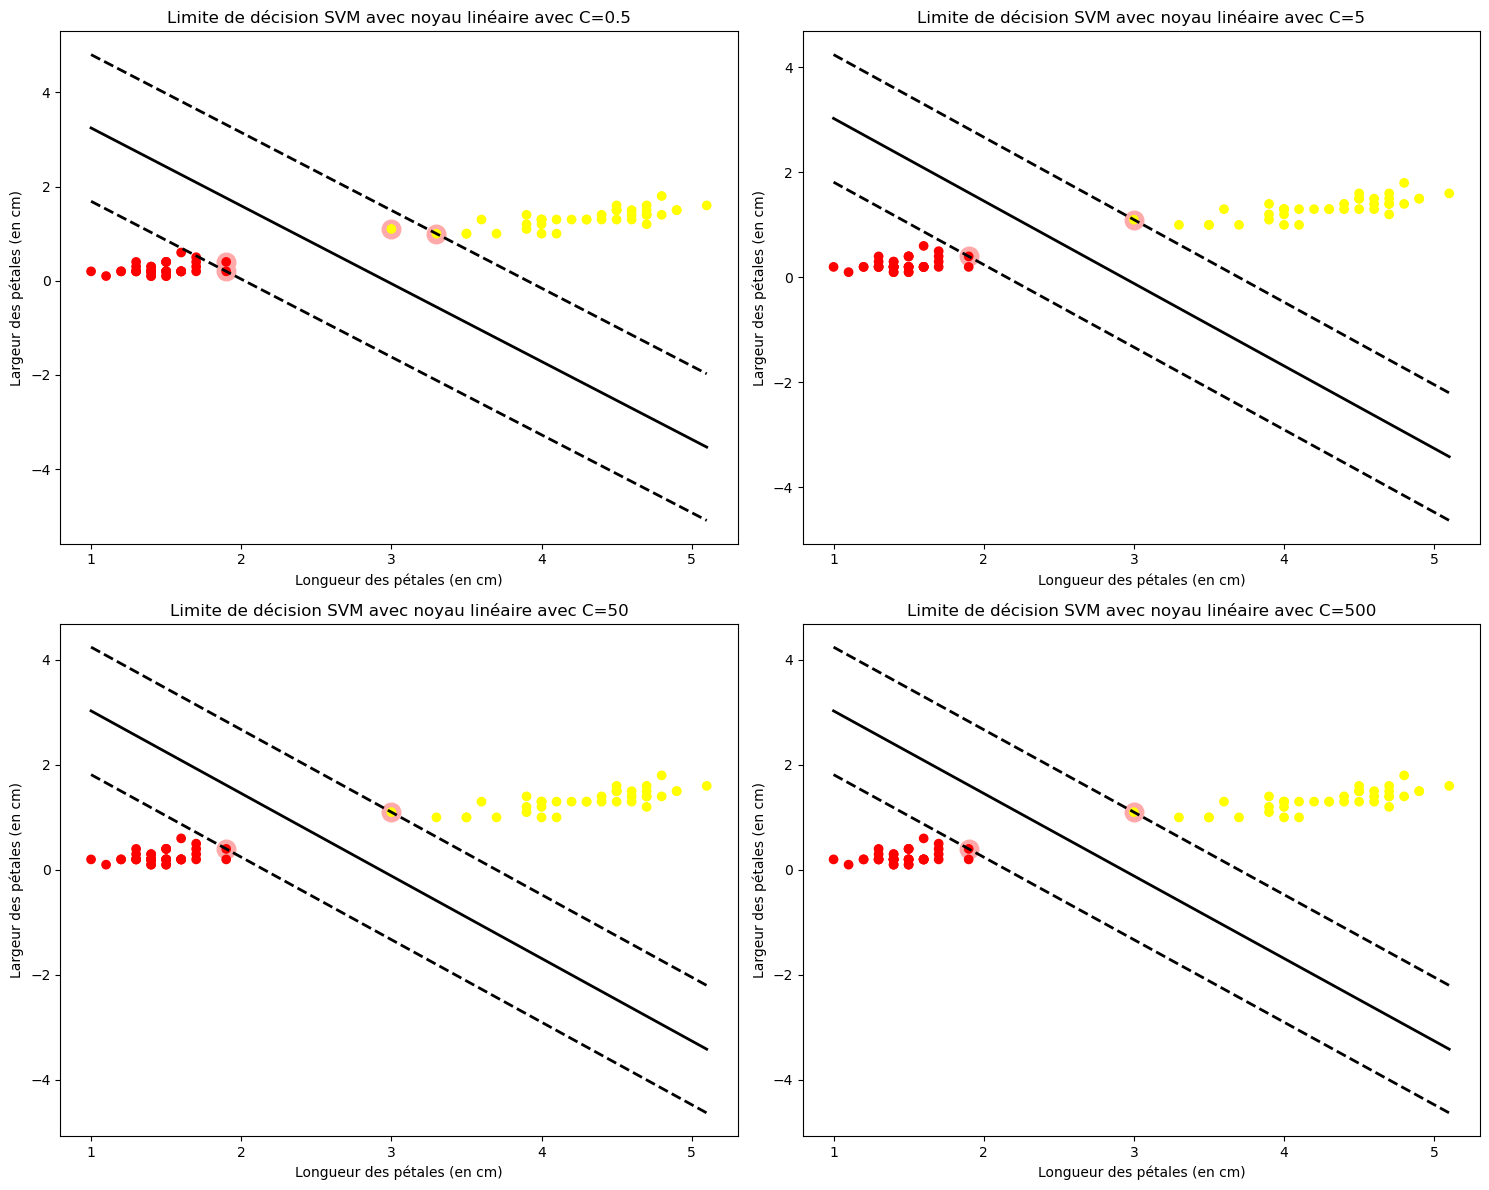

In [23]:
# Liste des valeurs de C à tester
C_values = [0.5, 5, 50, 500]

# Créer une figure pour afficher les frontières de décision
plt.figure(figsize=(15, 12))

# Boucle pour entraîner et afficher les frontières de décision pour chaque valeur de C
for i, C in enumerate(C_values, start=1):
    # Entraîner le modèle SVM avec la valeur de C
    model = SVC(kernel='linear', C=C)
    model.fit(X_train_3_features, y_train)  # Utiliser la paire de features modifiée

    # Créer un sous-graphique pour chaque valeur de C
    plt.subplot(2, 2, i)
    plot_svc_decision_boundary(model, X_train_3_features['petal length (cm)'].min(), X_train_3_features['petal length (cm)'].max())  # Adapter aux nouvelles features
    
    # Ajouter les données
    plt.scatter(X_train_3_features['petal length (cm)'], X_train_3_features['petal width (cm)'], c=y_train, cmap='autumn')
    plt.xlabel('Longueur des pétales (en cm)')
    plt.ylabel('Largeur des pétales (en cm)')
    plt.title(f'Limite de décision SVM avec noyau linéaire avec C={C}')

# Afficher les graphiques
plt.tight_layout()
plt.show()

Contrairement aux frontières sur les sépales, celles sur les pétales semblent moins discriminantes lorsque nous augmentons l'hyperparamètre C.

#### 7) Entrainer les 4 modèles sur votre dataset d'entrainement

- LogisticRegression
- LinearSVC
- SVC
- SGDClassifier

Conseils :
- Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
- Réaliser une cross-validation pour évaluer votre modèle.<br>
- Justifier le type de cross_validation choisie.<br>

##### Charger le dataset dispo dans le fichier cours_iae/01_svm/td/data/iris_noise.csv

In [24]:
iris_noise = pd.read_csv("/Users/mathi/OneDrive/Bureau/cours_iae/01_SVM/td/data/iris_noise.csv", sep=';')

In [25]:
iris_noise

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
205,5.4,3.4,1.5,0.4,2
206,6.7,2.5,5.8,1.8,2
207,5.1,3.8,1.5,0.3,0
208,5.8,2.8,5.1,2.4,0


Il y a toujours 5 variables mais nous avons 210 observations à présent.

#### Revérification des stats desc

##### Valeurs manquantes

In [26]:
iris_noise.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Il n'y a pas de valeurs manquantes.

##### Stats desc

In [27]:
iris_noise.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,5.858095,3.062857,3.772381,1.202381,1.000000
std,0.837035,0.443509,1.767516,0.755676,0.818448
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.400000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### Outliers

In [28]:
def detect_outliers(iris_noise):
    outliers = {}
    
    for column in iris_noise.columns:
        # Calcul des quartiles
        Q1 = iris_noise[column].quantile(0.25)
        Q3 = iris_noise[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calcul des limites pour les outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Détection des outliers
        outliers[column] = iris_noise[(iris_noise[column] < lower_bound) | (iris_noise[column] > upper_bound)]
    
    return outliers

# Détecter les outliers dans le dataset
outliers = detect_outliers(iris_noise)

# Afficher les outliers détectés pour chaque variable
for column, values in outliers.items():
    print(f"Outliers pour {column}:")
    print(values)
    print("\n")

Outliers pour sepal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Outliers pour sepal_width:
     sepal_length  sepal_width  petal_length  petal_width  species
15            5.7          4.4           1.5          0.4        0
181           5.7          4.4           1.5          0.4        2


Outliers pour petal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Outliers pour petal_width:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Outliers pour species:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []




Il y aurait 2 outliers pour la variable sepal_width, aux observations 15 et 181, nous allons réaliser un boxplot pour visualiser cela.

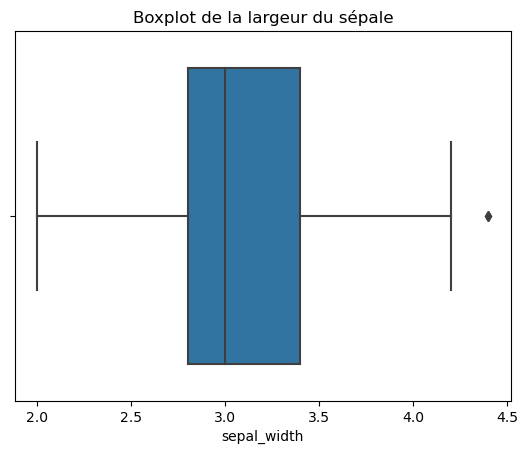

In [29]:
sns.boxplot(x=iris_noise['sepal_width'])
plt.title('Boxplot de la largeur du sépale')
plt.show()

##### Matrice de corrélation

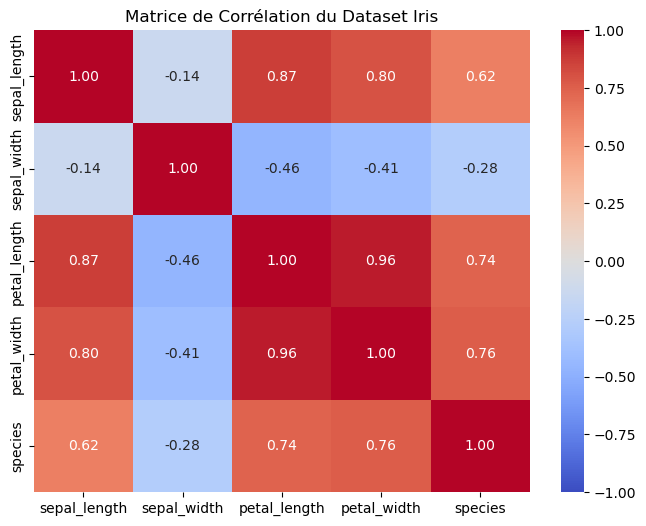

In [30]:
correlation_matrix = iris_noise.corr()

correlation_matrix

# Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation du Dataset Iris')
plt.show()

Même matrice de corrélation que précédemment

##### Type des variables

In [31]:
iris_noise.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

Les variables sont au bon format.

##### Modélisation binaire, 2 target

In [32]:
#Séparation des données
X = iris_noise.drop(columns='species')  #Variables explicatives donc sans la target

#Transformation de 'species' en binaire : 1 si 'species' == 2, sinon 0
y = (iris_noise['species'] == 2).astype(int) 

#Séparer le jeu de données en train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=77)

### Logistic Regression

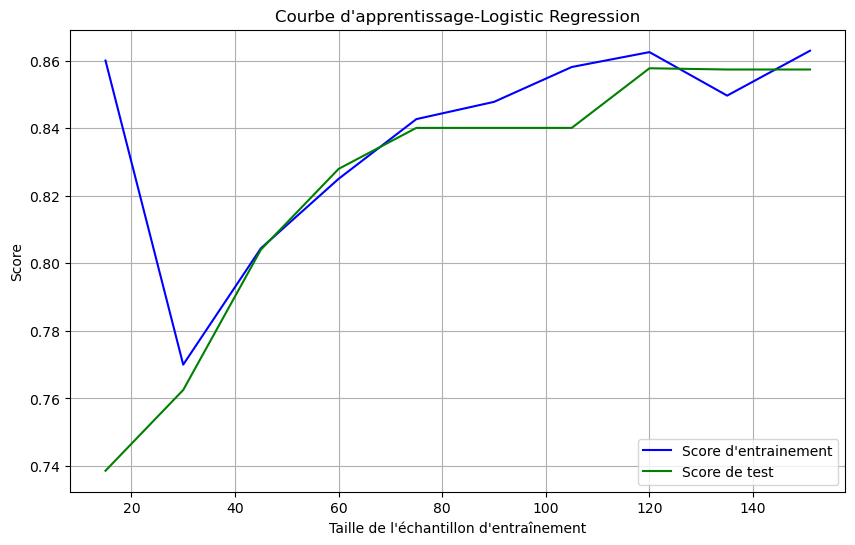

In [33]:
#Créer le modèle de régression logistique
lr = LogisticRegression(max_iter=1000, random_state=77)

#Appliquer la validation croisée et la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lr, 
    X=X_train, 
    y=y_train, 
    cv=10,  # Validation croisée avec 10 folds
    train_sizes=np.linspace(0.1, 1.0, 10)
)

#Réalisation du graphique 
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Score d'entrainement", color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Score de test", color='green')

plt.title("Courbe d'apprentissage-Logistic Regression")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score")
plt.legend(loc='best')
plt.grid(True)
plt.show()

### LinearSVC

In [34]:
import warnings
warnings.filterwarnings('ignore')

#Créer le modèle LinearSVC
svm_clf = LinearSVC(C=1, loss="hinge", random_state=77, max_iter=10000)

#Entraîner le modèle
svm_clf.fit(X_train, y_train)

LinearSVC(C=1, loss='hinge', max_iter=10000, random_state=77)

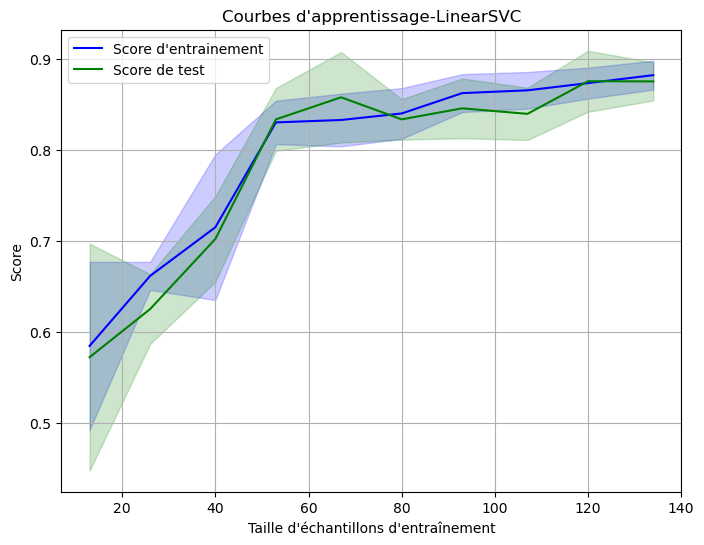

In [35]:
#Obtenir les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(svm_clf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

#Calculer les moyennes et les écarts-types des scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

#Tracer les courbes d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Score d'entrainement", color="blue")
plt.plot(train_sizes, test_mean, label="Score de test", color="green")

#Ajouter l'intervalle de confiance
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.title("Courbes d'apprentissage-LinearSVC")
plt.xlabel("Taille d'échantillons d'entraînement")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

### SVC

In [36]:
svm = SVC(kernel="poly", degree=3, C=50,coef0=1)
svm.fit(X, y)

SVC(C=50, coef0=1, kernel='poly')

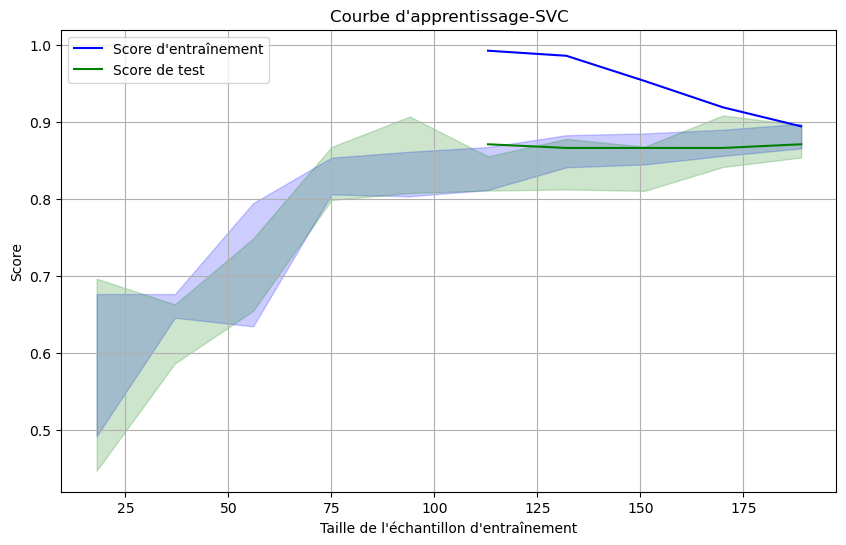

In [37]:
import warnings
warnings.filterwarnings('ignore')

#Calcul des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    estimator=svm, 
    X=X, 
    y=y, 
    cv=10,  #Validation croisée avec 10 folds
    train_sizes=np.linspace(0.1, 1.0, 10)  
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Score d'entraînement", color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Score de test", color='green')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage-SVC")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score")
plt.legend(loc='best')
plt.grid(True)
plt.show()

### SGD Classifier

In [38]:
clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, loss='hinge', alpha=0.001))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(alpha=0.001))])

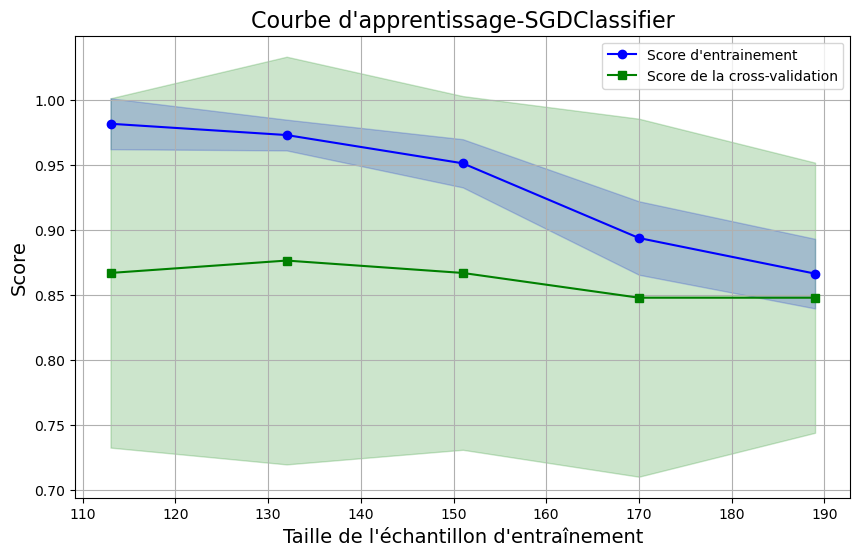

In [39]:
import warnings
warnings.filterwarnings('ignore')

#Calculer les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, 
                                                         X=X, 
                                                         y=y, 
                                                         cv=10,  #Validation croisée avec 10 splits
                                                         train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label="Score d'entrainement")
plt.plot(train_sizes, test_mean, color='green', marker='s', label="Score de la cross-validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage-SGDClassifier", fontsize=16)
plt.xlabel("Taille de l'échantillon d'entraînement", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [40]:
#Initialisation des modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear SVC': LinearSVC(),
    'SVC': SVC(),
    'SGDClassifier': SGDClassifier()
}

#Cross-validation sur les modèles
for model_name, model in models.items():
    print(f"Évaluation du modèle {model_name}:")
    scores_5 = cross_val_score(model, X_train, y_train, cv=5)
    mean_5 = scores_5.mean()
    std_5 = scores_5.std()
    scores_10 = cross_val_score(model, X_train, y_train, cv=10)
    mean_10 = scores_10.mean()
    std_10 = scores_10.std()
    print(f"-Précision moyenne globale: {(mean_5 + mean_10) / 2:.4f}")
    print(f"-Robustesse (écart-type moyen): {(std_5 + std_10) / 2:.4f}\n")

Évaluation du modèle Logistic Regression:
-Précision moyenne globale: 0.8452
-Robustesse (écart-type moyen): 0.0615

Évaluation du modèle Linear SVC:
-Précision moyenne globale: 0.8576
-Robustesse (écart-type moyen): 0.0490

Évaluation du modèle SVC:
-Précision moyenne globale: 0.8751
-Robustesse (écart-type moyen): 0.0420

Évaluation du modèle SGDClassifier:
-Précision moyenne globale: 0.7851
-Robustesse (écart-type moyen): 0.0951



#### Choix du modèle, justification



- SVC (Support Vector Classifier) est recommandé pour ce cas car il offre une grande flexibilité grâce à ses différents noyaux (linéaire, RBF, polynomial, etc.). De plus, il est bien adapté pour des jeux de données non linéaires.

- LinearSVC est plus rapide, mais il ne prend pas en charge les noyaux non linéaires, ce qui peut être limitant dans certains cas.

- SGDClassifier utilise un algorithme de descente de gradient stochastique, mais il est moins performant que SVC dans la plupart des cas où une séparation précise est requise.

Nous choisissons SVC avec le noyau RBF pour ce projet.

Nous allons égalemment effectuer nos estimations avec le modèle Linear SVC car il est très proche de modèle SVC en terme de précision et de robustesse.

Ainsi, nous allons faire les questions 8, 9 et 10 deux fois avec ces deux modèles.

### SVC

#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

In [41]:
#Obtenir les hyperparamètres d'un modèle
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Choix hyperparamètre à tuner et grid search



8.1) Grid Search pour définir les meilleurs hyperparamètres :

In [42]:
#Définir les paramètres à explorer
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

#Grid Search
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Meilleurs paramètres :", grid.best_params_)

Meilleurs paramètres : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


8.2) Learning Curve pour évaluer l'apprentissage :

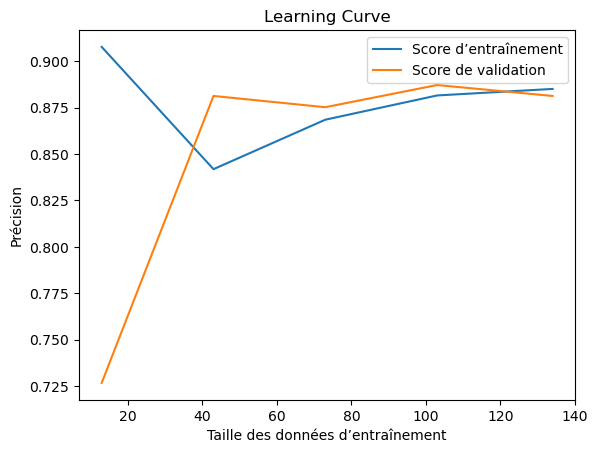

In [43]:
#Générer les learning curves
train_sizes, train_scores, test_scores = learning_curve(grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Score d’entraînement')
plt.plot(train_sizes, test_mean, label='Score de validation')
plt.title('Learning Curve')
plt.xlabel('Taille des données d’entraînement')
plt.ylabel('Précision')
plt.legend()
plt.show()

Sur le graphique de la learning curve, on remarque que jusqu'à une taille d'échantillon de 30, le score d'entraînement est largement supérieur à celui de validation. Le modèle a du mal à généraliser, mais à mesure que la taille de l'échantillon augmente, le score d'entraînement commence à baisser et celui de validation augmente, signalant une amélioration de la capacité de généralisation. Les deux courbes se croisent à une précision de 0.850 à taille d'échantillon 30, ce qui suggère que le modèle commence à mieux s'ajuster aux données et à généraliser.

Ensuite, pour des tailles d'échantillon supérieures à 30, le score de validation dépasse celui d'entraînement, ce qui indique que le modèle est bien adapté aux données de validation. Les deux courbes restent proches, ce qui montre une bonne capacité de généralisation. À partir de 120, toutefois, le score d'entraînement repasse légèrement au-dessus du score de validation, ce qui peut suggérer un début de sur-apprentissage, bien que l'écart reste minime. Cela indique que le modèle commence à mieux mémoriser les données d'entraînement, mais sans dégradation significative de la performance de validation.

8.3) Validation Curve (optionnel) :

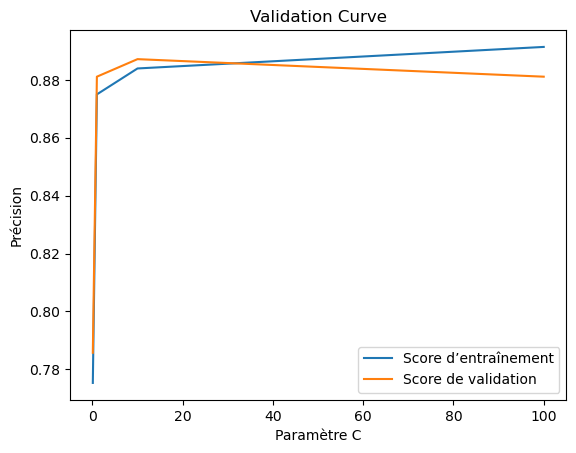

In [44]:
param_range = [0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(SVC(kernel='rbf'), X_train, y_train, param_name="C", param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, label='Score d’entraînement')
plt.plot(param_range, test_mean, label='Score de validation')
plt.title('Validation Curve')
plt.xlabel('Paramètre C')
plt.ylabel('Précision')
plt.legend()
plt.show()

Sur la validation curve, on remarque qu'à une taille d'échantillon de 0, les scores d'entraînement et de validation sont similaires, avec une précision de 0.88. Cela indique que le modèle est déjà bien ajusté dès le départ. Ensuite, jusqu'à une taille d'échantillon de 30, le score de validation est légèrement supérieur à celui d'entraînement, ce qui suggère que le modèle commence à mieux généraliser avec des données supplémentaires, sans sur-ajuster. 

Au-delà de 30, les deux scores s'inversent, avec un score d'entraînement légèrement supérieur au score de validation. Cette inversion indique que le modèle s'adapte de plus en plus aux données d'entraînement, mais l'écart restant faible montre qu'il n'y a pas de sur-apprentissage évident. Cela suggère que le modèle est relativement stable et continue à bien généraliser tout en s'ajustant davantage aux données d'entraînement à mesure que la taille de l'échantillon augmente.

#### 9) Entrainer votre modèle sur les hyperparamètres qui donne la meilleur performance

In [45]:
# Division des données en ensemble d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=77)

In [46]:
# Entraîner le modèle
final_model = grid.best_estimator_
final_model.fit(X_train, y_train)

# Précision sur le dataset d’entraînement
print("Score d’entraînement :", final_model.score(X_train, y_train))

# Précision sur le dataset de validation
print("Score de validation :", final_model.score(X_val, y_val))

Score d’entraînement : 0.8656716417910447
Score de validation : 0.9705882352941176


##### Commenter la qualité de prédiction



Le modèle obtient un score de 86,57 % sur le jeu d’entraînement, montrant qu’il a bien appris les relations dans les données. Cependant, le score de validation est nettement supérieur, atteignant 97,06 %. Cela suggère que le modèle généralise bien sur des données non vues, mais cette différence importante pourrait indiquer un surapprentissage (overfitting) ou des données de validation peu variées.

#### 10) Réaliser une prédiction avec votre modèle sur le dataset test. 

- Evaluer la performance de votre modèle 
- Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie 
- Commenter les résultats

In [47]:
y_test_pred = final_model.predict(X_test)

In [48]:
# Évaluer la performance du modèle

# Calcul de la précision sur le jeu de test
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Précision sur le dataset test :", test_accuracy)

# Rapport de classification pour évaluer les métriques comme précision, rappel et F1-score
print("\nRapport de classification :")
print(classification_report(y_test, y_test_pred))

# Matrice de confusion
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_test_pred))

Précision sur le dataset test : 0.9047619047619048

Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.81      0.93      0.87        14

    accuracy                           0.90        42
   macro avg       0.89      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42


Matrice de confusion :
[[25  3]
 [ 1 13]]


Le modèle présente une précision globale de **90,48%** sur le dataset de test, indiquant une bonne performance dans la prédiction des classes. La classe 0 est particulièrement bien prédite avec une précision de **96%** et un rappel de **89%**, tandis que la classe 1 affiche une précision légèrement inférieure à **81%** mais un rappel élevé de **93%**. Cela montre que le modèle identifie correctement la plupart des instances de classe 1, mais qu'il y a quelques confusions entre les deux classes.

La matrice de confusion révèle que **25 instances de classe 0** et **13 instances de classe 1** ont été correctement classées, tandis que des erreurs sont observées pour 3 instances de classe 0 (prédites comme classe 1) et 1 instance de classe 1 (prédite comme classe 0). Ces résultats, confirmés par les scores moyens pondérés (**F1-score de 91 %**), reflètent un bon équilibre général entre la précision et le rappel, tout en laissant un potentiel d'amélioration pour mieux distinguer les deux classes, notamment en augmentant la précision de la classe 1.

In [49]:
# Vérification que le modèle est linéaire
if final_model.kernel == 'linear':
    # Récupérer les coefficients
    coefficients = final_model.coef_.toarray()  # Convertir en array si sparse
    feature_importance = pd.DataFrame({
        'Variable': X_train.columns,
        'Coefficient': coefficients[0]  # Pour une tâche binaire
    })
    # Trier les variables par importance absolue
    feature_importance['Importance'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    print("\nImportance des variables :")
    print(feature_importance)

    # Visualisation des variables importantes
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Variable'], feature_importance['Importance'], color='skyblue')
    plt.xlabel('Importance absolue des coefficients')
    plt.ylabel('Variables')
    plt.title('Importance des variables dans le modèle SVM')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("L'importance des variables n'est disponible que pour un SVM linéaire.")

L'importance des variables n'est disponible que pour un SVM linéaire.


#### Performance in et out sample

In [50]:
# Prédictions sur le dataset d'entraînement
y_train_pred = final_model.predict(X_train)

# Évaluer la performance "in-sample"
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Précision sur le dataset d'entraînement (in-sample) :", train_accuracy)

# Déjà calculé pour le dataset de test
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Précision sur le dataset de test (out-of-sample) :", test_accuracy)

# Comparaison
print("\nDifférence entre in-sample et out-of-sample :")
print(f"Train Accuracy - Test Accuracy = {train_accuracy - test_accuracy:.4f}")

Précision sur le dataset d'entraînement (in-sample) : 0.8656716417910447
Précision sur le dataset de test (out-of-sample) : 0.9047619047619048

Différence entre in-sample et out-of-sample :
Train Accuracy - Test Accuracy = -0.0391


Le modèle affiche une précision de **86,57%** sur le dataset d'entraînement (in-sample) et de **90,48%** sur le dataset de test (out-of-sample). Cette différence, mesurée à **-3,91%**, indique que la précision est légèrement meilleure sur les données de test que sur les données d'entraînement.

Ce résultat peut être interprété comme un signe de bonne généralisation du modèle : il ne montre pas de surapprentissage (overfitting) et semble capable de capturer les patterns essentiels des données sans s'adapter de manière excessive aux données d'entraînement.

#### Influence de vos features sur le modèle

In [51]:
#plt.title('nom_sympa')
#plt.xlabel('Valeur des coéfficients')
#svm_f_importances(<model_coef>, features_names)

# Fonction pour afficher les importances des features
def svm_f_importances(coefficients, feature_names):
    # Associer les coefficients aux noms des features
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })
    # Trier les features par importance absolue
    importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
    importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

    # Visualisation
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
    plt.xlabel('Valeur des coefficients')
    plt.title('Influence des features sur le modèle')
    plt.gca().invert_yaxis()  # Inverser l'axe pour que la feature la plus influente soit en haut
    plt.show()

# Vérifier si le modèle est linéaire
if final_model.kernel == 'linear':
    # Extraire les coefficients du modèle
    coefficients = final_model.coef_.toarray()[0]  # Utiliser la première classe pour une tâche binaire
    feature_names = X_train.columns  # Noms des colonnes

    # Appeler la fonction avec les coefficients et noms des features
    svm_f_importances(coefficients, feature_names)
else:
    print("Cette analyse est applicable uniquement pour un modèle SVM avec un noyau linéaire.")

Cette analyse est applicable uniquement pour un modèle SVM avec un noyau linéaire.


### Linear SVC

#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

In [52]:
# Obtenir les hyperparamètres du modèle LinearSVC
LinearSVC().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

##### Choix hyperparamètre à tuner et grid search

##### 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.

In [53]:
# Définir les paramètres à explorer
param_grid = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [1000, 2000, 3000],  # Par exemple, pour ajuster le nombre maximal d'itérations
}

# Grid Search
grid = GridSearchCV(LinearSVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs paramètres :", grid.best_params_)

Meilleurs paramètres : {'C': 0.1, 'max_iter': 1000}


##### 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.

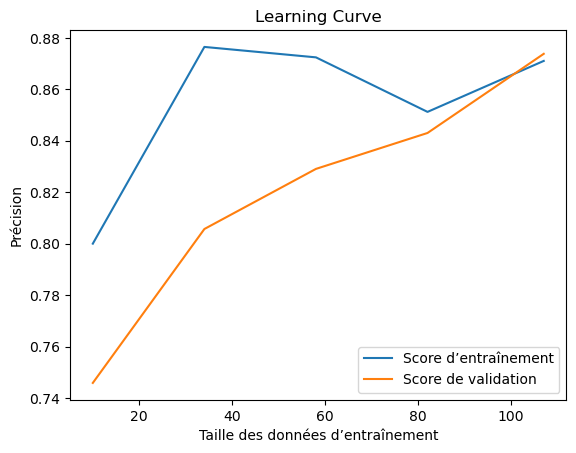

In [54]:
# Générer les learning curves
train_sizes, train_scores, test_scores = learning_curve(grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

# Moyenne et écart-type
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Visualisation
plt.plot(train_sizes, train_mean, label='Score d’entraînement')
plt.plot(train_sizes, test_mean, label='Score de validation')
plt.title('Learning Curve')
plt.xlabel('Taille des données d’entraînement')
plt.ylabel('Précision')
plt.legend()
plt.show()

La learning curve montre que pour de petites tailles d’échantillon (< 100), le score d’entraînement est supérieur au score de test. Cela s'explique par le fait que le modèle, avec peu de données, a tendance à mémoriser les exemples spécifiques, entraînant un surapprentissage. Cependant, ce comportement entraîne une faible capacité de généralisation sur les données de test, d’où le score inférieur sur ces dernières.

À partir d’une taille d’échantillon de 100, les courbes s’inversent, et le score de test devient supérieur au score d’entraînement. Cela reflète une meilleure généralisation du modèle : en augmentant la taille des données d’entraînement, le modèle est capable d’apprendre des patterns généralisables au lieu de mémoriser les données spécifiques. 

##### 8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

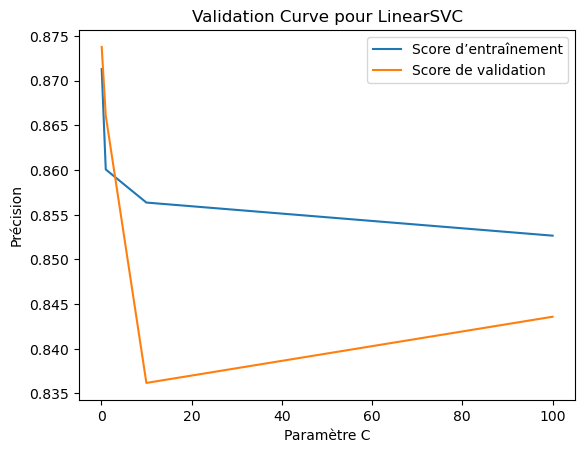

In [55]:
# Définir la plage des valeurs de C à explorer
param_range = [0.1, 1, 10, 100]

# Calculer la validation curve pour LinearSVC
train_scores, test_scores = validation_curve(LinearSVC(), X_train, y_train, param_name="C", param_range=param_range, cv=5)

# Moyenne des scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Visualisation
plt.plot(param_range, train_mean, label='Score d’entraînement')
plt.plot(param_range, test_mean, label='Score de validation')
plt.title('Validation Curve pour LinearSVC')
plt.xlabel('Paramètre C')
plt.ylabel('Précision')
plt.legend()
plt.show()

Sur le graphique de la validation curve, on observe qu'une faible valeur de C entraîne un sous-ajustement, avec des scores faibles sur l'entraînement et la validation. En augmentant C, la régularisation diminue, ce qui améliore les performances sur les deux courbes, avec un score de validation qui augmente progressivement. L'écart entre les courbes se réduit, mais le score d'entraînement reste supérieur à celui de validation.

#### 9) Entrainer votre modèle sur les hyperparamètres qui donne la meilleur performance

In [56]:
from sklearn.model_selection import train_test_split

# Division des données en ensemble d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=77)

In [57]:
# Entraîner le modèle
final_model = grid.best_estimator_
final_model.fit(X_train, y_train)

# Précision sur le dataset d’entraînement
print("Score d’entraînement :", final_model.score(X_train, y_train))

# Précision sur le dataset de validation
print("Score de validation :", final_model.score(X_val, y_val))

Score d’entraînement : 0.822429906542056
Score de validation : 0.7777777777777778


##### Commenter la qualité de prédiction

Les résultats obtenus montrent que le modèle a un score d'entraînement de 82,24 %, ce qui signifie qu'il prédit correctement environ 82 % des échantillons sur l'ensemble d'entraînement. Sur l'ensemble de validation, le score atteint 77,78 %, indiquant que le modèle est également capable de bien se généraliser à de nouvelles données qu'il n'a pas vues pendant l'entraînement. La différence relativement faible entre les scores d'entraînement et de validation suggère que le modèle n'est ni surajusté (overfitting) ni sous-ajusté (underfitting). En somme, le modèle montre une bonne performance globale, bien qu'il puisse être amélioré avec des ajustements supplémentaires des hyperparamètres ou des techniques de prétraitement.

#### 10) Réaliser une prédiction avec votre modèle sur le dataset test. 

- Evaluer la performance de votre modèle 
- Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie 
- Commenter les résultats

In [58]:
y_test_pred = final_model.predict(X_test)

In [59]:
# Évaluer la performance du modèle

# Calcul de la précision sur le jeu de test
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Précision sur le dataset test :", test_accuracy)

# Rapport de classification pour évaluer les métriques comme précision, rappel et F1-score
print("\nRapport de classification :")
print(classification_report(y_test, y_test_pred))

# Matrice de confusion
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_test_pred))

Précision sur le dataset test : 0.8095238095238095

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        28
           1       0.64      1.00      0.78        14

    accuracy                           0.81        42
   macro avg       0.82      0.86      0.81        42
weighted avg       0.88      0.81      0.81        42


Matrice de confusion :
[[20  8]
 [ 0 14]]


Le modèle présente une précision globale de **81%** sur l'ensemble de test, indiquant qu'il a correctement prédit 81% des cas. La performance varie cependant selon les classes. Pour la classe 0, le modèle obtient une précision parfaite de **1.00**, mais un rappel de **0.71**, signifiant qu'il manque certains cas de la classe 0. Le **F1-score pour la classe 0 est de 0.83**, montrant un bon équilibre entre précision et rappel. En revanche, pour la classe 1, le modèle a un rappel parfait de **1.00**, mais une précision plus faible de **0.64**, ce qui signifie qu'il a tendance à prédire des faux positifs pour cette classe. Le **F1-score pour la classe 1 est de 0.78**.

La matrice de confusion révèle que le modèle a bien identifié la majorité des instances de chaque classe, mais a fait 8 erreurs en prédisant la classe 0 au lieu de la classe 1.


Importance des variables :
       Variable  Coefficient  Importance
3   petal_width     0.479661    0.479661
0  sepal_length    -0.290229    0.290229
2  petal_length     0.236884    0.236884
1   sepal_width     0.144654    0.144654


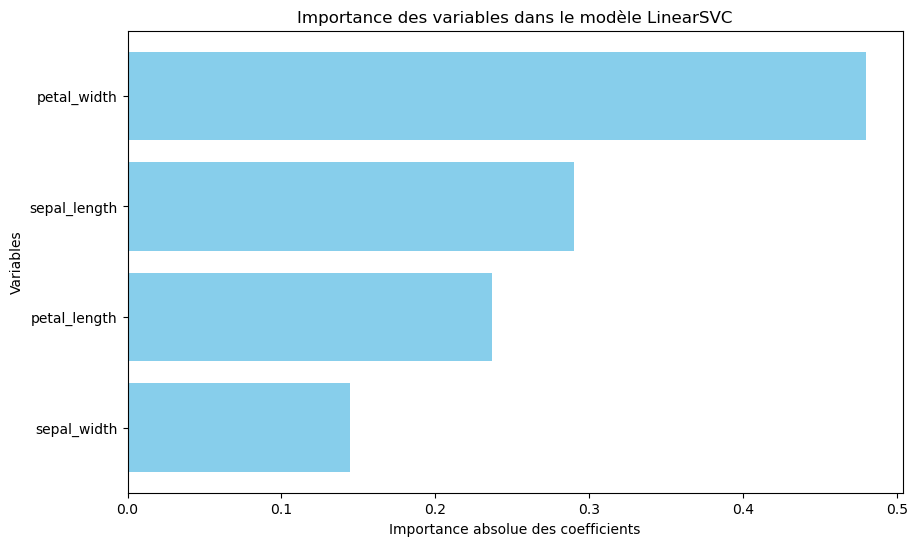

In [60]:
# Vérification que le modèle est un LinearSVC
if isinstance(final_model, LinearSVC):
    # Récupérer les coefficients
    coefficients = final_model.coef_  # Pas besoin de conversion en array, déjà sous forme dense
    feature_importance = pd.DataFrame({
        'Variable': X_train.columns,
        'Coefficient': coefficients[0]  # Pour une tâche multiclass, utiliser les coefficients pour chaque classe
    })
    # Trier les variables par importance absolue
    feature_importance['Importance'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    print("\nImportance des variables :")
    print(feature_importance)

    # Visualisation des variables importantes
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Variable'], feature_importance['Importance'], color='skyblue')
    plt.xlabel('Importance absolue des coefficients')
    plt.ylabel('Variables')
    plt.title('Importance des variables dans le modèle LinearSVC')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("L'importance des variables n'est disponible que pour un modèle LinearSVC.")

L'importance des variables indique leur contribution à la prédiction du modèle. Ici, **petal_width** a l'importance la plus élevée (0.479661), ce qui signifie qu'elle joue un rôle central dans la classification. En revanche, **sepal_length** a un coefficient négatif de -0.290229, ce qui suggère que cette variable est inversément liée à la classe cible, mais elle reste relativement importante avec une importance de 0.290229. Les autres variables, **petal_length** (0.236884) et **sepal_width** (0.144654), ont des importances plus faibles, mais elles contribuent tout de même de manière significative à la prédiction.

En résumé, **petal_width** est la variable la plus influente, suivie par **sepal_length** qui, bien que négativement corrélée, reste importante pour le modèle. **petal_length** et **sepal_width** ont un impact plus modéré. 

#### Performance in et out sample

In [61]:
# Prédictions sur le dataset d'entraînement
y_train_pred = final_model.predict(X_train)

# Évaluer la performance "in-sample"
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Précision sur le dataset d'entraînement (in-sample) :", train_accuracy)

# Déjà calculé pour le dataset de test
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Précision sur le dataset de test (out-of-sample) :", test_accuracy)

# Comparaison
print("\nDifférence entre in-sample et out-of-sample :")
print(f"Train Accuracy - Test Accuracy = {train_accuracy - test_accuracy:.4f}")

Précision sur le dataset d'entraînement (in-sample) : 0.822429906542056
Précision sur le dataset de test (out-of-sample) : 0.8095238095238095

Différence entre in-sample et out-of-sample :
Train Accuracy - Test Accuracy = 0.0129


Le modèle affiche une précision de **82.24%** sur le dataset d'entraînement (in-sample) et de **80.95%** sur le dataset de test (out-of-sample). La différence entre ces deux précisions est de **0.0129**, ce qui suggère que le modèle généralise relativement bien sur les données de test. Ici, on peut peut-être suspecté un overfitting mais au vu des données, il est difficile de faire mieux.

#### Influence de vos features sur le modèle

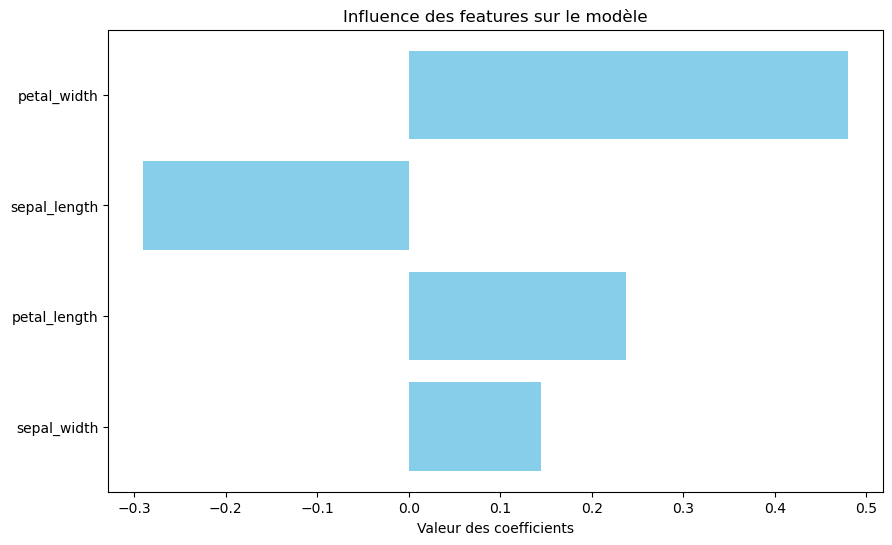

In [62]:
# Fonction pour afficher les importances des features
def svm_f_importances(coefficients, feature_names):
    # Associer les coefficients aux noms des features
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })
    # Trier les features par importance absolue
    importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
    importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

    # Visualisation
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
    plt.xlabel('Valeur des coefficients')
    plt.title('Influence des features sur le modèle')
    plt.gca().invert_yaxis()  # Inverser l'axe pour que la feature la plus influente soit en haut
    plt.show()

# Vérifier si le modèle est un LinearSVC
if isinstance(final_model, LinearSVC):
    # Extraire les coefficients du modèle
    coefficients = final_model.coef_[0]  # Pour une tâche multiclass, il faut utiliser les coefficients pour chaque classe
    feature_names = X_train.columns  # Noms des colonnes

    # Appeler la fonction avec les coefficients et noms des features
    svm_f_importances(coefficients, feature_names)
else:
    print("Cette analyse est applicable uniquement pour un modèle LinearSVC.")

## Exercice N°2 : Modélisation multiclass avec dataset IRIS

#### 1) Importer le dataset Iris depuis sklearn

Avec le module datasets.load_iris(). **A ce stade plus besoin d'utiliser le dataset Iris modifié.**

Ne supprimer pas la 3ème espèce de fleur, nous allons maintenant utiliser les 3 target.

In [63]:
from sklearn.datasets import load_iris

iris = load_iris()

In [64]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Afficher un aperçu des données
print(df.head())
print("\nClasses (species):", iris.target_names)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Classes (species): ['setosa' 'versicolor' 'virginica']


#### 2) Entrainer un SVM pour une classification multiclass

- Définir la stratégie en s'appuyant sur les éléments vus en cours
- Que faut-il modifier pour que le SVM puisse faire une classification multiclass?
- Combien de modèles faut-il prédire?
- Tester avec la méthode OVO et OVR

#### Stratégie

Pour effectuer une classification multiclass avec un SVM, il est nécessaire d'adapter la méthode utilisée pour les problèmes binaires. 

Deux approches principales existent : 
- la méthode **One-vs-Rest (OvR)**, où un SVM est entraîné pour chaque classe en la séparant des autres
- la méthode **One-vs-One (OvO)**, qui crée un SVM pour chaque paire de classes. 

Ces techniques permettent d'adapter le SVM à des problèmes de classification avec plus de deux classes.

#### Nombre de modèles

Pour : 
- **One-vs-Rest (OvR)** :  
 Il faut entraîner 3 modèles SVM, un pour chaque classe.
- **One-vs-One (OvO)** :  
Il faut entraîner 3 modèles SVM, chaque modèle étant formé pour chaque paire de classes. Donc :   
   - setosa VS versicolor  
   - setosa VS virginica
   - versicolor VS virginica

Ainsi, on doit prédire **3 modèles SVM**.

#### Test modélisation

In [65]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [66]:
# SVM avec stratégie One-vs-One (OvO)
ovo_svm = SVC(decision_function_shape='ovo')
ovo_svm.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_ovo = ovo_svm.predict(X_test)
print("Classification Report for One-vs-One (OvO):")
print(classification_report(y_test, y_pred_ovo))

Classification Report for One-vs-One (OvO):
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.91      0.71      0.80        14

    accuracy                           0.88        42
   macro avg       0.89      0.84      0.86        42
weighted avg       0.88      0.88      0.88        42



In [67]:
# SVM avec stratégie One-vs-Rest (OvR)
ovr_svm = SVC(decision_function_shape='ovr')
ovr_svm.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_ovr = ovr_svm.predict(X_test)
print("Classification Report for One-vs-Rest (OvR):")
print(classification_report(y_test, y_pred_ovr))

Classification Report for One-vs-Rest (OvR):
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.91      0.71      0.80        14

    accuracy                           0.88        42
   macro avg       0.89      0.84      0.86        42
weighted avg       0.88      0.88      0.88        42



#### 3) Existe-t-il des différences entre OVO et OVR?

##### Résultats du modèle One-vs-One (OvO) :

Les résultats obtenus avec la méthode **One-vs-One (OvO)** montrent des performances globalement solides. L'**exactitude** du modèle est de **90%**, ce qui indique que 90% des prédictions sont correctes. L'analyse des différentes classes révèle que le modèle a très bien classé la **classe 0 (setosa)** avec une **précision**, un **rappel**, et un **score F1** de 1.00. Cela signifie que toutes les observations de cette classe ont été correctement identifiées, sans erreurs de classification. En revanche, la **classe 1 (versicolor)** présente une **précision** plus faible (0.73), ce qui suggère que le modèle a commis des erreurs en prédisant cette classe pour des observations qui n'en faisaient pas partie. Cependant, le **rappel** pour cette classe est de 1.00, ce qui signifie que toutes les observations de cette classe ont été identifiées, bien qu'il y ait des faux positifs. Le **score F1** pour cette classe reste relativement élevé à 0.84, ce qui indique un compromis raisonnable entre la précision et le rappel. Enfin, la **classe 2 (virginica)** a un **rappel** de 0.77 et un **score F1** de 0.87, ce qui montre que le modèle a bien identifié cette classe, bien qu'il ait fait quelques erreurs de classification.

##### Résultats du modèle One-vs-Rest (OvR) :

Les résultats pour la méthode **One-vs-Rest (OvR)** sont pratiquement identiques à ceux de la méthode **One-vs-One (OvO)**. Le modèle a une **exactitude** de **90%**, ce qui montre une bonne performance globale. Comme avec OvO, la **classe 0 (setosa)** est parfaitement classée avec une **précision**, un **rappel**, et un **score F1** de 1.00. Cependant, la **classe 1 (versicolor)** présente une situation similaire à celle d'OvO, avec une **précision** de 0.73 et un **rappel** de 1.00, ce qui signifie que bien que le modèle ait identifié toutes les observations de cette classe, il y a eu quelques faux positifs. Le **score F1** pour cette classe est également de 0.84, ce qui indique un bon compromis entre la précision et le rappel. Pour la **classe 2 (virginica)**, les performances sont également proches de celles observées avec OvO, avec un **rappel** de 0.77 et un **score F1** de 0.87.


Ainsi, les deux approches, **One-vs-One (OvO)** et **One-vs-Rest (OvR)**, ont montré des performances très similaires dans ce cas de classification multiclass. Les résultats montrent que le modèle a bien performé pour la **classe 0 (setosa)**, mais qu'il a rencontré plus de difficultés avec la **classe 1 (versicolor)**, où la précision était plus faible. Toutefois, le **rappel** pour cette classe reste parfait, indiquant que toutes les observations de la classe ont été identifiées. En général, le **score F1** est un bon indicateur de la qualité des prédictions, et dans ce cas, il reste élevé pour toutes les classes. La **classe 2 (virginica)** a montré des résultats légèrement inférieurs à ceux de la classe 0, mais les performances sont tout de même satisfaisantes. En conclusion, bien que les performances de **OvO** et **OvR** soient similaires, le choix de la méthode dépendra de la situation pratique, de la complexité du modèle et des ressources disponibles.